In [1]:
from pathlib import Path

In [7]:
tb_fpath = str(next(Path("../all-results/her-sac-toylab/tensorboard/HER_1").iterdir()))
csv_fpath = "./delme.csv"

In [9]:
from app_utils import dump_tb_rewards_to_csv

/home/tomasruiz/code/thesis/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tomasruiz/code/thesis/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tomasruiz/code/thesis/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tomasruiz/code/thesis/env/lib/python3.6/site-pack

In [10]:
dump_tb_rewards_to_csv(tb_fpath, csv_fpath)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


DataLossError: truncated record at 87792278

# R Plotting

In [39]:
library(data.table)
library(zoo)
library(ggplot2)
dt <- fread("./delme.csv")

In [40]:
rollavg <- function(s) rollmean(s, 100, align = "right", fill=NA)

dt$success <- as.numeric(!dt$episode_reward %in% c(-80, -79))
dt$avg_success <- rollavg(dt$success)
dt$avg_reward <- rollavg(dt$episode_reward)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



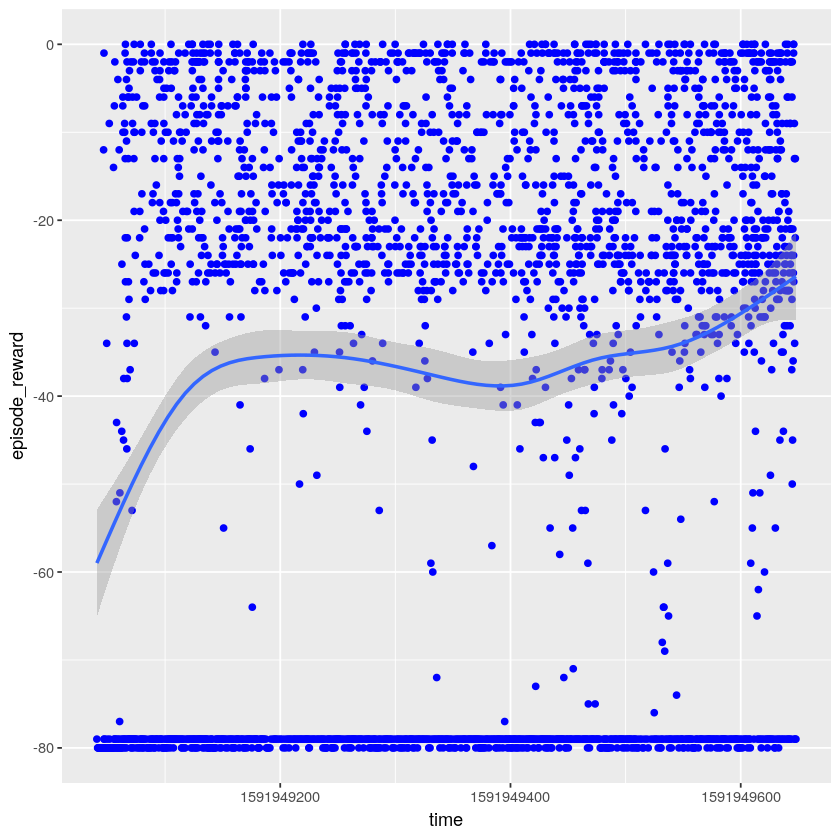

In [43]:
ggplot(dt, aes(time, episode_reward)) + geom_point(color="blue") + geom_smooth()

# Julia Plotting

In [30]:
using DataFrames, CSV, RollingFunctions, Plots

In [10]:
df = CSV.read("./ex-train.csv")

,Column1,time,step,episode_reward
,Int64,Float64,Int64,Float64
1,0,1.59195e9,240,-80.0
2,1,1.59195e9,320,-80.0
3,2,1.59195e9,400,-80.0
4,3,1.59195e9,480,-80.0
5,4,1.59195e9,560,-80.0
6,5,1.59195e9,640,-80.0
7,6,1.59195e9,720,-80.0
8,7,1.59195e9,800,-80.0
9,8,1.59195e9,880,-80.0


In [25]:
methods(rollmean)

# 6 methods for generic function "rollmean":
[1] rollmean(data::V, windowspan::Int64) where {T, V<:AbstractArray{Union{Missing, T},1}} in RollingFunctions at /home/tomas/.julia/packages/RollingFunctions/4Jh9c/src/roll/rollstats.jl:14
[2] rollmean(data::V, windowspan::Int64) where {T, V<:AbstractArray{T,1}} in RollingFunctions at /home/tomas/.julia/packages/RollingFunctions/4Jh9c/src/roll/rollstats.jl:14
[3] rollmean(data::V, windowspan::Int64, weighting::StatsBase.AbstractWeights) where {T, V<:AbstractArray{Union{Missing, T},1}} in RollingFunctions at /home/tomas/.julia/packages/RollingFunctions/4Jh9c/src/roll/rollstats.jl:18
[4] rollmean(data::V, windowspan::Int64, weighting::StatsBase.AbstractWeights) where {T, V<:AbstractArray{T,1}} in RollingFunctions at /home/tomas/.julia/packages/RollingFunctions/4Jh9c/src/roll/rollstats.jl:18
[5] rollmean(data::V, windowspan::Int64, weighting::AbstractArray{S,1}) where {T, V<:AbstractArray{Union{Missing, T},1}, S} in RollingFunctions at /home/tomas/.julia/packages/RollingFunctions/4Jh9c/src/roll/rollstats.jl:16
[6] rollmean(data::V, windowspan::Int64, weighting::AbstractArray{S,1}) where {T, V<:AbstractArray{T,1}, S} in RollingFunctions at /home/tomas/.julia/packages/RollingFunctions/4Jh9c/src/roll/rollstats.jl:16

In [58]:
nrow(df)

2683

In [60]:
y = vcat(repeat([missing], 19), rollmean(df[:, "episode_reward"], 20))

2683-element Array{Union{Missing, Float64},1}:
    missing
    missing
    missing
    missing
    missing
    missing
    missing
    missing
    missing
    missing
    missing
    missing
    missing
   ⋮
 -24.25
 -23.2
 -23.1
 -24.35
 -27.85
 -27.25
 -23.95
 -24.45
 -27.2
 -26.45
 -25.65
 -29.3

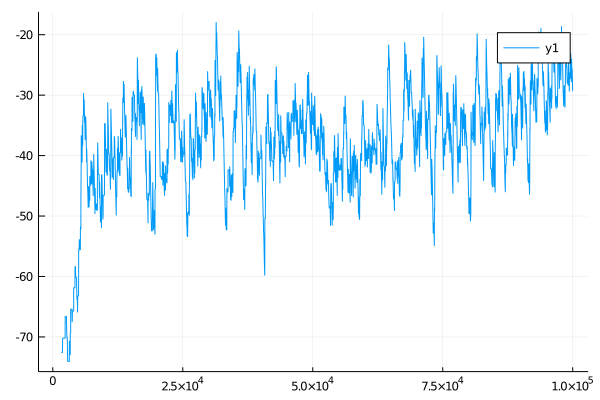

In [61]:
plot(df.step, y)

In [33]:
tail(dt)

V1,time,step,episode_reward,avg_reward
<int>,<dbl>,<int>,<dbl>,<dbl>
2677,1591949647,99753,-13,-26.00
2678,1591949647,99788,-34,-26.33
2679,1591949647,99868,-79,-27.02
2680,1591949647,99890,-22,-27.11
2681,1591949647,99904,-13,-26.95
2682,1591949648,99984,-79,-27.71
